In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [2]:
x,y=make_classification(n_classes=2,n_clusters_per_class=1,n_samples=400,n_features=2,n_informative=2,n_redundant=0,random_state=3)

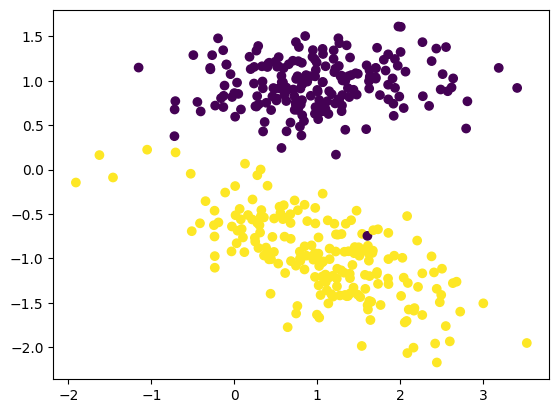

In [3]:
plt.scatter(x[:,[0]],x[:,[1]],c=y)

In [4]:
# converting y in (-1,1) since svm will use -1 and 1 
y[y==0]=-1
y

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1

In [5]:
print(x.shape[1])

2


In [6]:
class Svm:
    # constructor
    def __init__(self,c=1.0):
    # c =penalty cost,w=weights,b=bia 
        self.c=c
        self.w=0
        self.b=0
    # function that will calculate loss function(hinge loss)
    def updated_weight(w,loss_w,learning_rate):
        w=w-learning_rate*loss_w
        return w
    def updated_bias(b,ti,y,learning_rate,c):
        if(ti>=1):
            return b
        else:
            b=b+learning_rate*c*y
            return b
    def hinge_loss(self,x,y,w,b):
        loss=0.0
        loss += 0.5*np.dot(w,w.T)
        # dealing with a particular row at a time
        for i in range(0,x.shape[0]):
            ti=y[i]*(np.dot(w,np.transpose(x[i]))+b) # ti will be an value
            loss +=self.c*(max(0,1-ti))    
        # loss_function will be a matrix so convert it into scaler
        return loss[0][0]
    def fit(self,x,y,batch_size=20,learning_rate=0.001,no_of_epoch=50):
        no_of_features=x.shape[1]
        
        no_of_samples=x.shape[0]
        n=learning_rate
        c=self.c
        # initialising our model parameters
        w=np.zeros((1,no_of_features))
        # b=bias
        b=0
        loss_list=[]
        # training our model
        # weight and bias update rule
        for i in range(no_of_epoch):
            # training loop
            loss=self.hinge_loss(x,y,w,b)
            loss_list.append(loss)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            # defining batch_gradient_descent
            for batch_start in range(0,no_of_samples,batch_size):
                # batch is 0,10,20,30  if batch_size=10
                gradient_w=0  #gradient w.r.t weight
                gradient_b=0 #gradient wrt bias
                # iterating over each element of batch
                for j in range(batch_start,batch_start+batch_size):
                    # j will iterate through each sample in batch one by one
                    if j<no_of_samples:
                        # i will go one by one to this randomly shuffled order
                        i=ids[j]
                        ti=y[i]*(np.dot(w,np.transpose(x[i]))+b)
                        if(ti>1):
                            gradient_b+=0
                            gradient_w+=0
                        else:
                            gradient_w+= (c*y[i]*x[i])
                            gradient_b+= (c)*y[i]
              # updating weights and biases with gradient
                w=w-n*w + n*gradient_w 
                b=b + n*gradient_b
                
        self.w=w
        self.b=b
        return w,b,loss_list
        
   

In [7]:
# ids=np.arange(100)
# np.random.shuffle(ids)
# print(ids)
# batch_size=10
# for batch in range(0,100,batch_size):
#     # batch=10,20,30 etc
#     for j in range(batch,batch+batch_size):
#         i=ids[j]
#         print(i)
#     print('ola')
# # so we will take (ex:- 10 values ) and compute the gradient over these examples and update the weights and biases
# # in one epoch

In [8]:
my_svm_object=Svm()


In [9]:
w,b,loss_list=my_svm_object.fit(x,y)

In [10]:
loss_list

[400.0,
 251.99336447540375,
 124.58922604500619,
 74.37985675501204,
 57.00166587791182,
 47.97270737371622,
 42.76019740562498,
 39.23363539296278,
 36.64122555468231,
 34.66108880183516,
 32.946705948293804,
 31.539401969511804,
 30.500208894324732,
 29.609204241573902,
 28.844649681377327,
 28.063898402382414,
 27.469858454317208,
 26.913572997066094,
 26.385623755332592,
 25.92015451354096,
 25.49797447388061,
 25.167882491273623,
 24.84156399334412,
 24.529689291919,
 24.26626237620567,
 24.05269685992906,
 23.819699715894767,
 23.615583350538145,
 23.48940475574296,
 23.366678678154614,
 23.25828070332424,
 23.14083771466694,
 23.043976721691934,
 22.98178329876596,
 22.96038566182206,
 22.914175429181046,
 22.833663266737084,
 22.822903829860508,
 22.81351165729981,
 22.775908364871647,
 22.76467031260408,
 22.76943198681957,
 22.722919713675832,
 22.70344523585568,
 22.702967320823703,
 22.72390234453965,
 22.712303069119898,
 22.678494114953125,
 22.689365668349442,
 22.66879

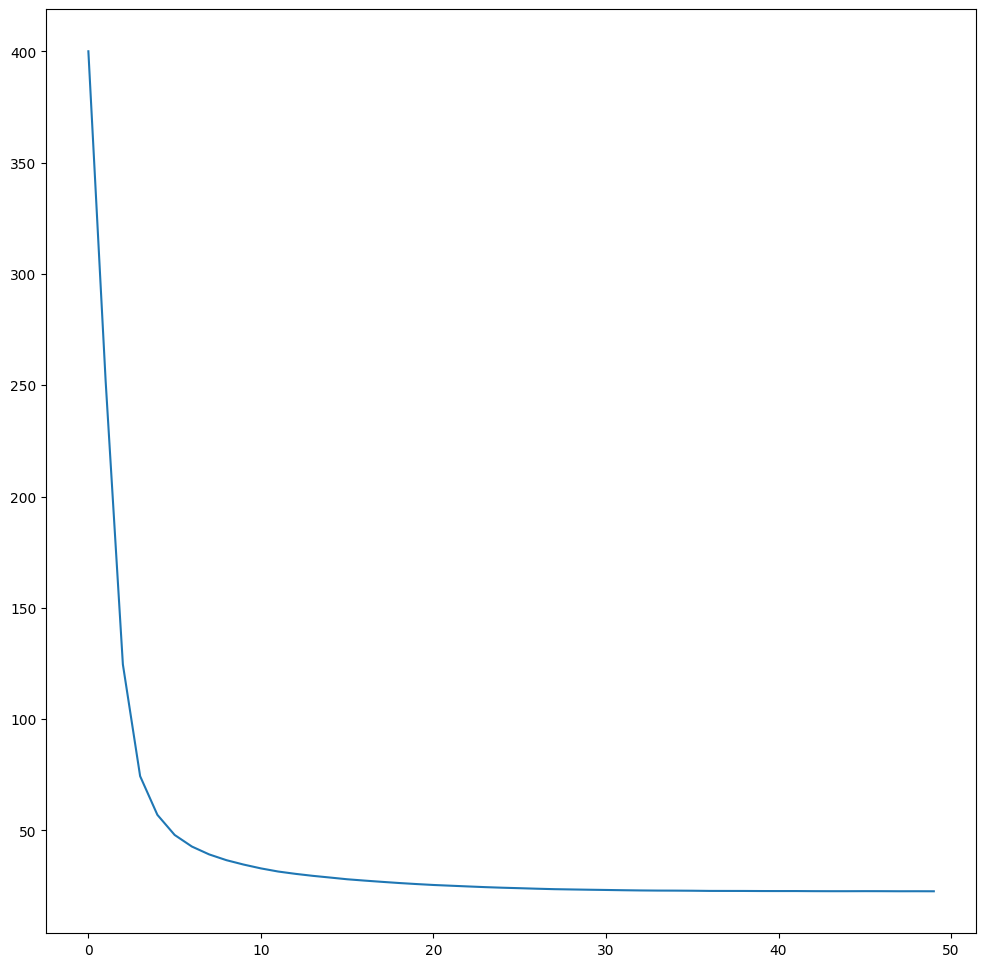

In [11]:
# plotting loss function
plt.figure(figsize=(12,12))
plt.plot(np.arange(0,len(loss_list)),loss_list)

In [12]:
print(my_svm_object.w)
print(my_svm_object.b)

[[-0.18798876 -1.56652539]]
0.24000000000000016


In [13]:
# plotting our hyperplane
# equation of line is like wx+b or w1x1+w2x2+b=0
# in order to do so x2=(-b-x1w1)/w2
def plotHyperplane(w,b):
    plt.figure(figsize=(18,18))
    x1=np.linspace(-2,4,10)
    x2=(-b-x1*w[0][0])/w[0][1]
    plt.plot(x1,x2)
    plt.scatter(x[:,[0]],x[:,[1]],c=y)
    plt.show()



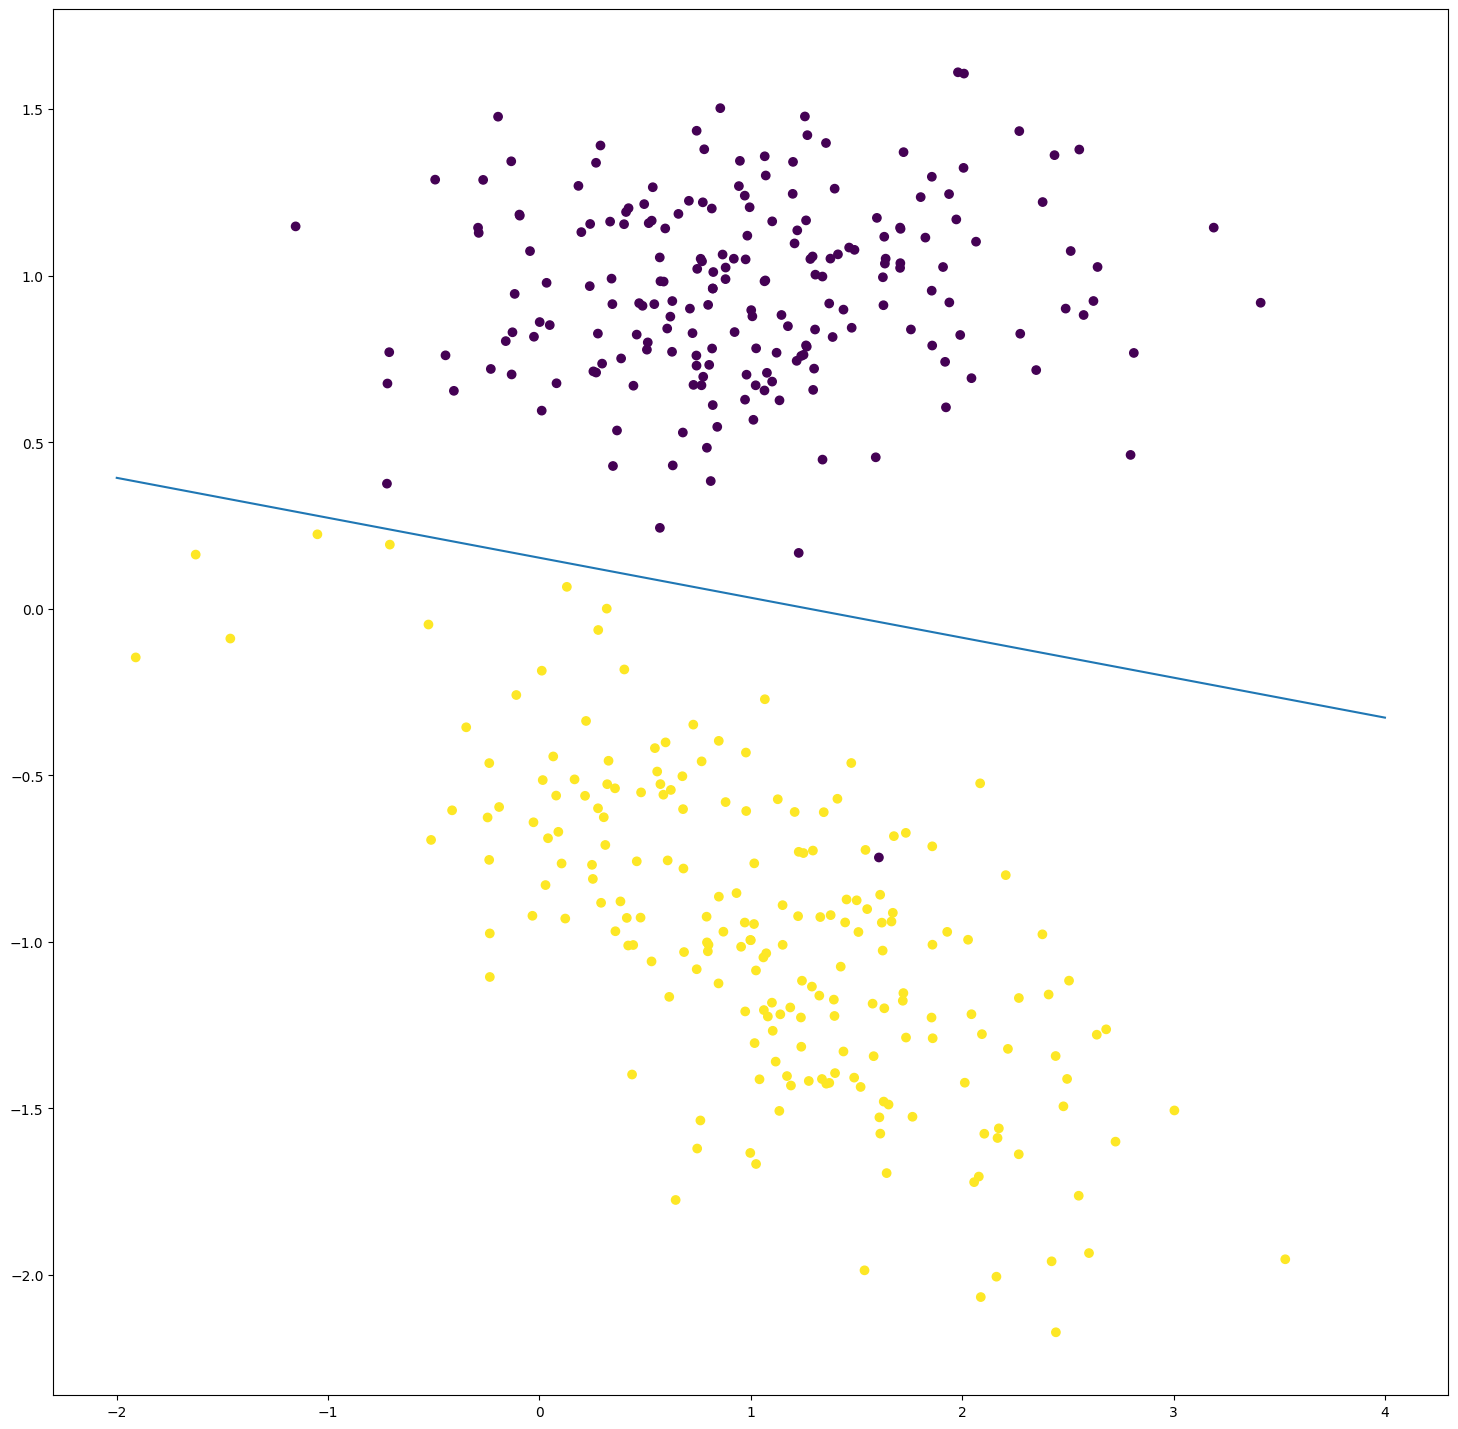

In [14]:
plotHyperplane(w,b)

# visualising Support vectors planes-positive and negative ones

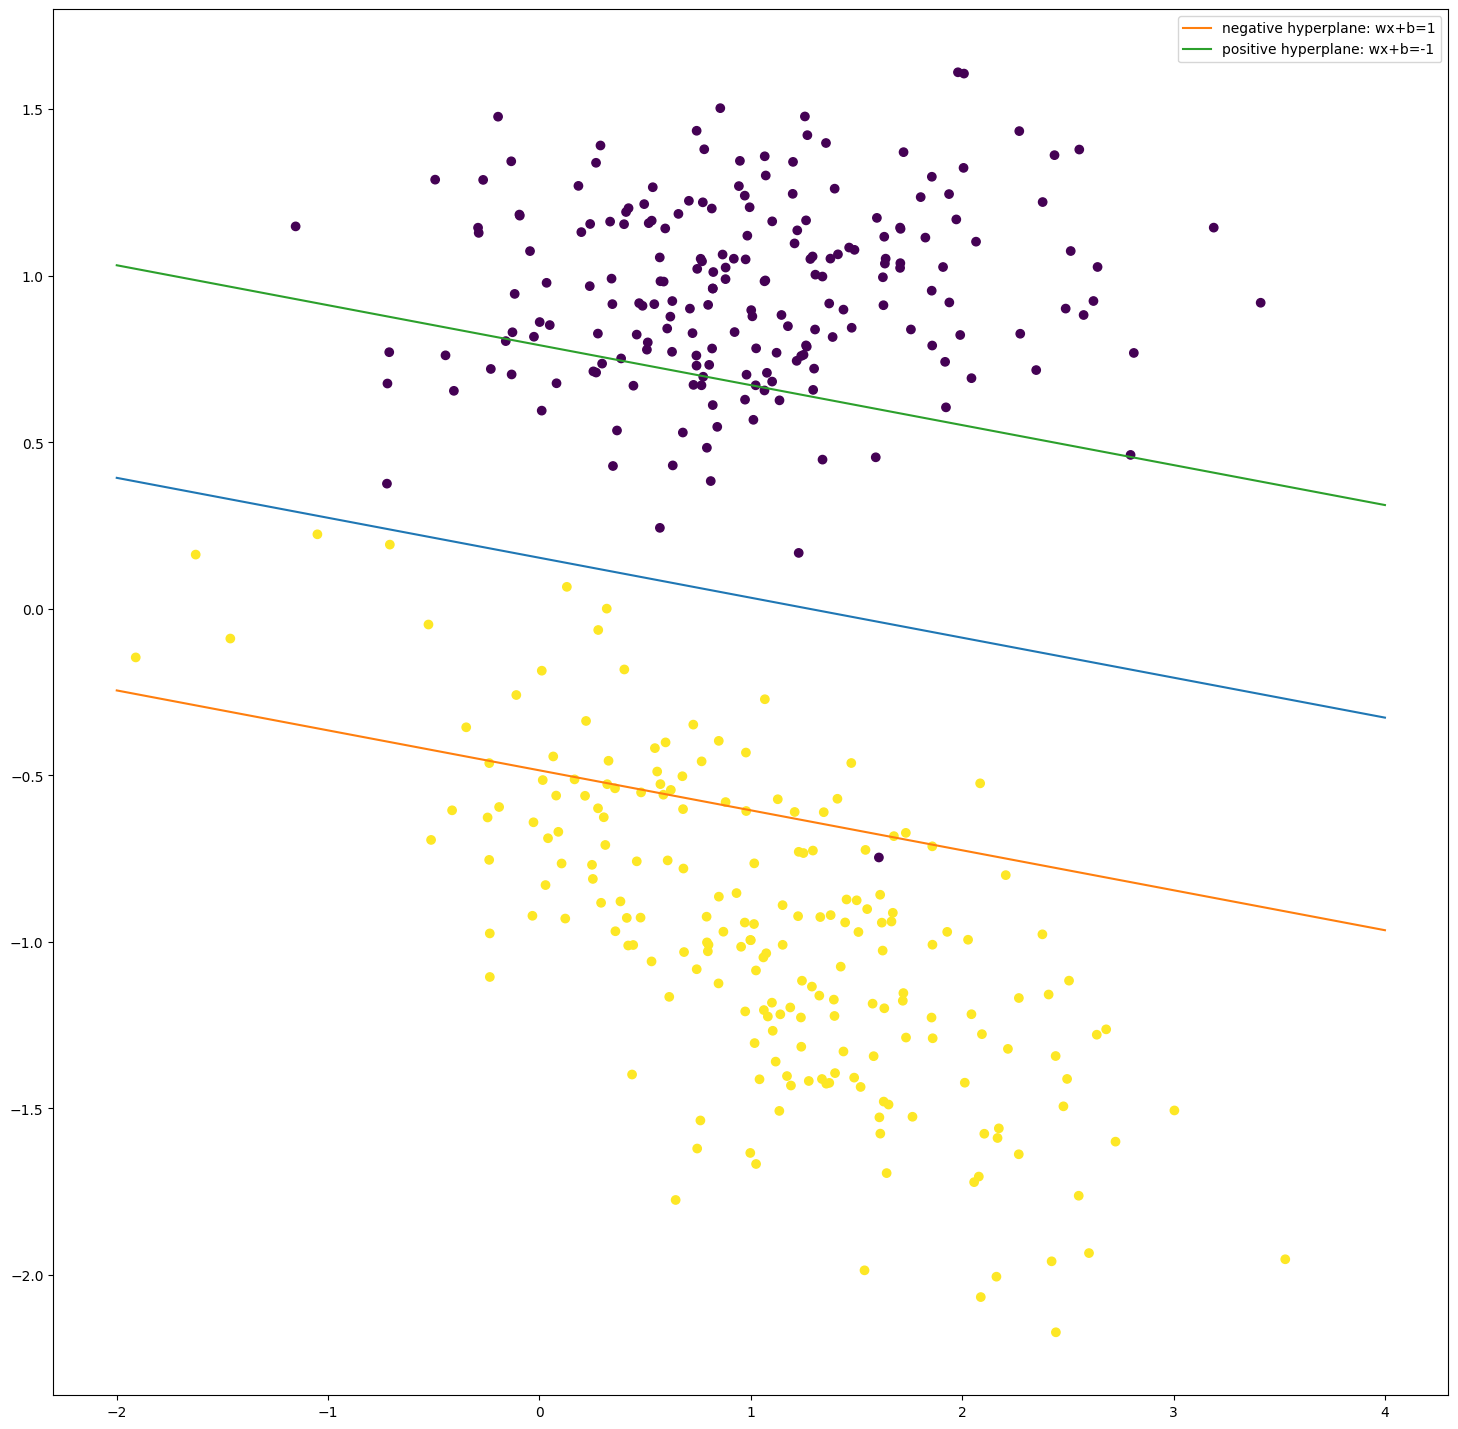

In [15]:
plt.figure(figsize=(18,18))
x1=np.linspace(-2,4,10)
x2=-(b+x1*w[0][0])/w[0][1]
x_positive=-(1+b+x1*w[0][0])/w[0][1]
x_negative=-(-1+b+x1*w[0][0])/w[0][1]

plt.plot(x1,x2)
plt.plot(x1,x_negative,label='negative hyperplane: wx+b=1')
plt.plot(x1,x_positive,label='positive hyperplane: wx+b=-1')
plt.scatter(x[:,[0]],x[:,[1]],c=y)
plt.legend()
plt.show()

## effect of increasing penalty

400.0 22.668790902473162


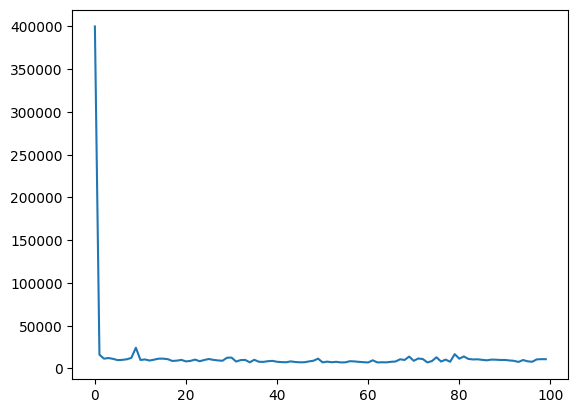

In [16]:
c=1000
my_object=Svm(c)
w,b,loss_list2=my_object.fit(x,y,no_of_epoch=100)
print(loss_list[0],loss_list[-1])
plt.plot(np.arange(0,len(loss_list2)),loss_list2)

### from above we observe that loss function increase significantly due to the cost/penalty increase-if increases more it may result in overfitting

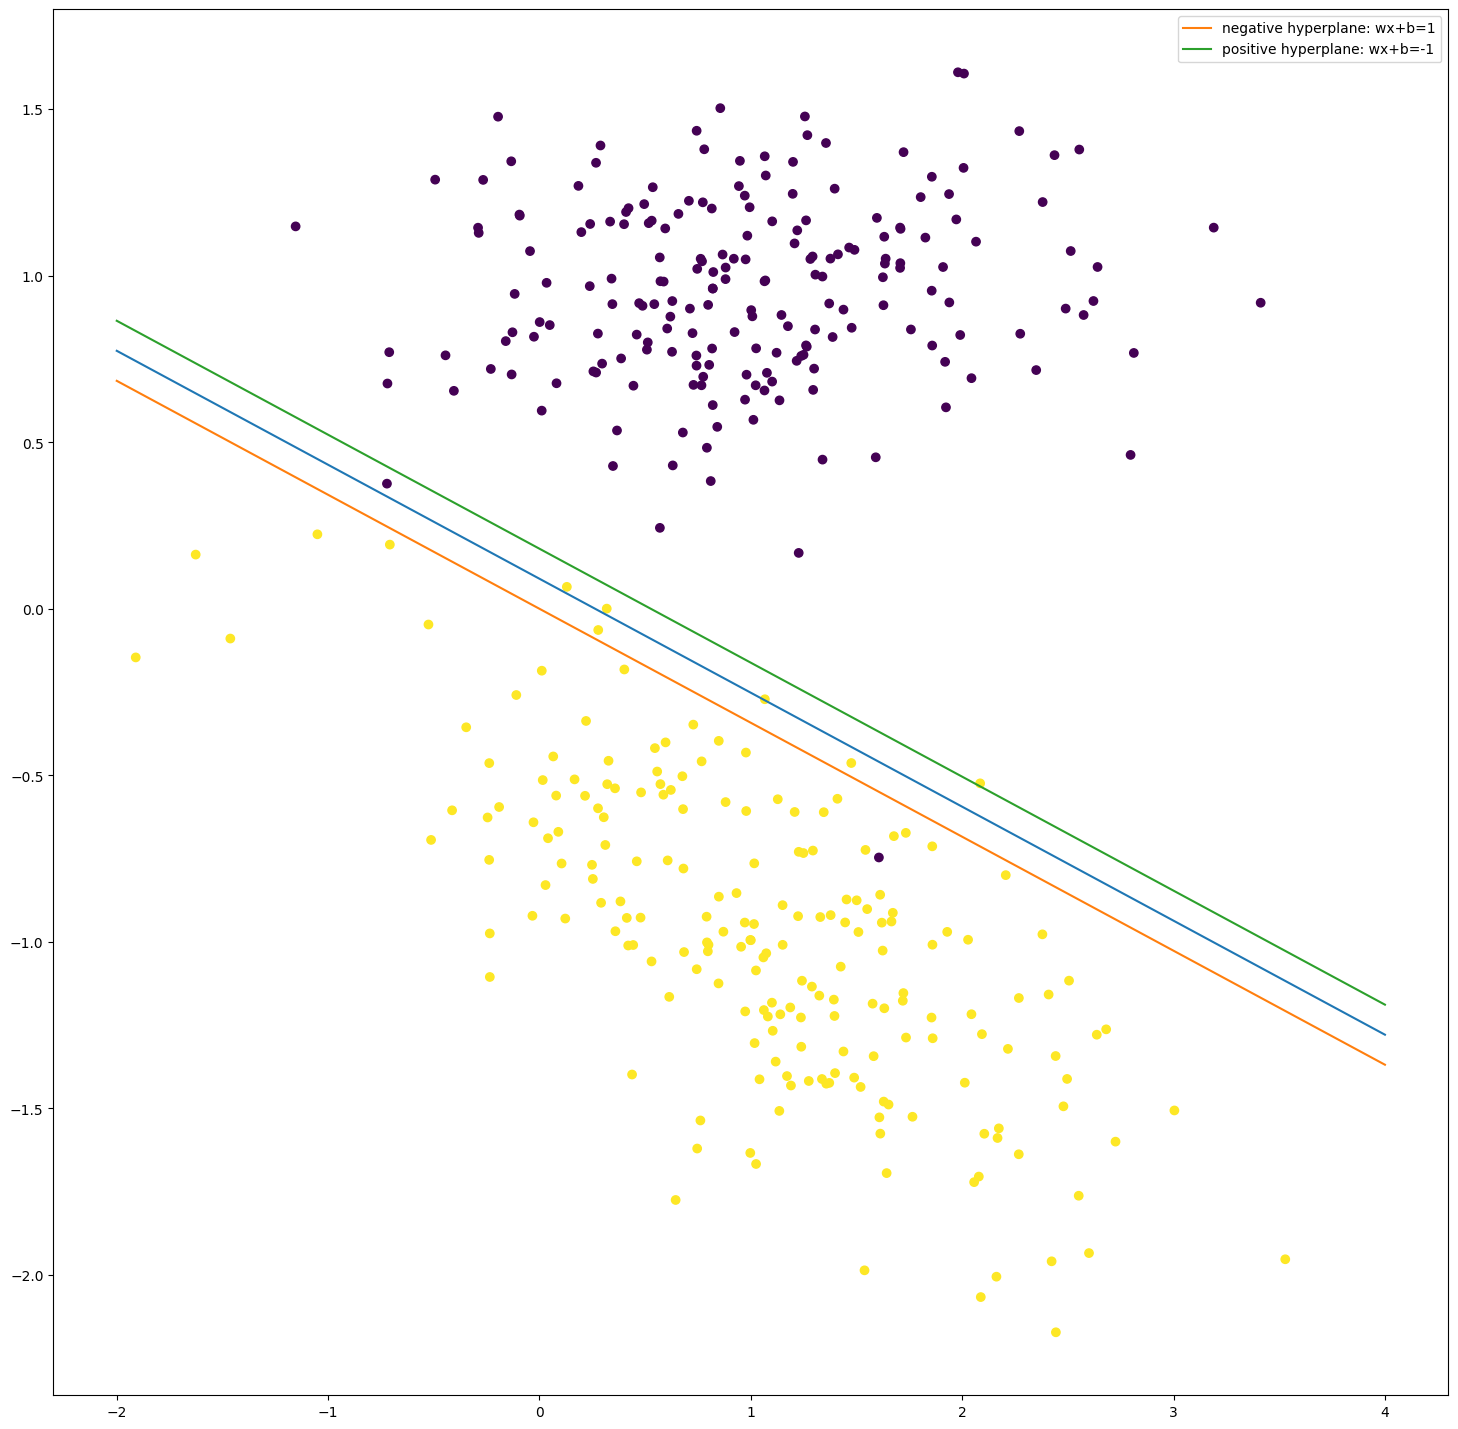

In [17]:
plt.figure(figsize=(18,18))
x1=np.linspace(-2,4,10)
x2=-(b+x1*w[0][0])/w[0][1]
x_positive=-(1+b+x1*w[0][0])/w[0][1]
x_negative=-(-1+b+x1*w[0][0])/w[0][1]

plt.plot(x1,x2)
plt.plot(x1,x_negative,label='negative hyperplane: wx+b=1')
plt.plot(x1,x_positive,label='positive hyperplane: wx+b=-1')
plt.scatter(x[:,[0]],x[:,[1]],c=y)
plt.legend()
plt.show()

### svm tried  to move each point in the right class at the cost of reduced margin. It is doing so because the penalty of wrong classification is very high 